In [1]:
from sally import YoungStars
import os
from tqdm import trange
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
directory = '/Users/AdinaFeinstein/Documents/young_stars'
files = [i for i in os.listdir(directory) if 'hlsp' in i]

In [9]:
temps, rotation = [], []
groups, tics = [], []

for fn in files:
    f = fn.split('tic')[1]
    tic = f.split('_')[0]
    tics.append(tic)
tics = np.unique(tics)
for t in tics:
    subset = [i for i in files if str(t) in i]
    groups.append(subset)

In [30]:
for i in trange(len(groups)):
    ys = YoungStars(fn=groups[i], fn_dir='.')
    temps.append(ys.teff)
    rotation.append(ys.p_rot)

100%|██████████| 312/312 [08:58<00:00,  1.46s/it]


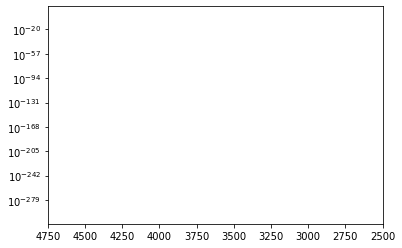

In [4]:
temps = np.array(temps)
rotation = np.array(rotation)

plt.plot(temps, rotation, 'k.')
plt.xlim(4750, 2500)
plt.yscale('log')
plt.show()

In [11]:
groups[19]

['hlsp_eleanor_tess_ffi_tic134328164_s08_tess_v0.2.0_lc.fits',
 'hlsp_eleanor_tess_ffi_tic134328164_s07_tess_v0.2.0_lc.fits']

In [12]:
ys = YoungStars(fn=groups[19], fn_dir=directory)

/Users/AdinaFeinstein/Documents/young_stars/sally/sally/flare_business.py:63: ResourceWarning: unclosed file <_io.FileIO name='/Users/AdinaFeinstein/Documents/young_stars/hlsp_eleanor_tess_ffi_tic134328164_s08_tess_v0.2.0_lc.fits' mode='rb' closefd=True>
  s = eleanor.Source(fn=fn, fn_dir=self.directory)
/anaconda3/lib/python3.6/site-packages/eleanor/targetdata.py:134: ResourceWarning: unclosed file <_io.FileIO name='/Users/AdinaFeinstein/Documents/young_stars/hlsp_eleanor_tess_ffi_tic134328164_s08_tess_v0.2.0_lc.fits' mode='rb' closefd=True>
  self.load(directory=self.source_info.fn_dir)
/Users/AdinaFeinstein/Documents/young_stars/sally/sally/flare_business.py:63: ResourceWarning: unclosed file <_io.FileIO name='/Users/AdinaFeinstein/Documents/young_stars/hlsp_eleanor_tess_ffi_tic134328164_s07_tess_v0.2.0_lc.fits' mode='rb' closefd=True>
  s = eleanor.Source(fn=fn, fn_dir=self.directory)
/anaconda3/lib/python3.6/site-packages/eleanor/targetdata.py:134: ResourceWarning: unclosed file <

In [ ]:
filtered = sigma_clip(ys.norm_flux, sigma=2.5, maxiters=8)
plt.plot(ys.time[~filtered.mask], ys.norm_flux[~filtered.mask], '.')
#plt.plot(ys.time[np.array([355,357,697])], ys.norm_flux[np.array([355,357,697])], 'k.', ms=15)

In [ ]:
#ys.savitsky_golay()
ys.gp_modeling()

In [ ]:
plt.figure(figsize=(14,8))
gp = ys.gp_model*1e3+1
plt.plot(ys.time[~ys.mask], ys.norm_flux[~ys.mask], 'k', alpha=0.8,
        linewidth=5)
plt.plot(ys.time, gp, c='orange', linewidth=3)
plt.plot(ys.time, ys.norm_flux[~ys.mask]-gp+0.9, c='turquoise')